In [ ]:
from google.colab import files
files.upload()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import poisson
#from scipy.stats import expon
#from scipy.stats import geom
#from scipy.stats import binom
import math as m
from statsmodels.stats import weightstats as stests
from scipy import stats
import statsmodels.api as sm
from scipy.stats import ttest_1samp
from scipy.stats import chisquare # Statistical test (chistat, pvalue)
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway # Numeric Vs categorical for many categories
from scipy.stats import ttest_ind
from scipy.stats import levene
from scipy.stats import shapiro
from statsmodels.formula.api import ols
from scipy.stats import pearsonr, spearmanr
from scipy.stats import kruskal
from statsmodels.graphics.gofplots import qqplot

In [ ]:
#import the dataset
df=pd.read_csv('Yulubike_sharing.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**About Yulu**
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.
Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!
Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.



How you can help here?
The company wants to know:
•	Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
•	How well those variables describe the electric cycle demands


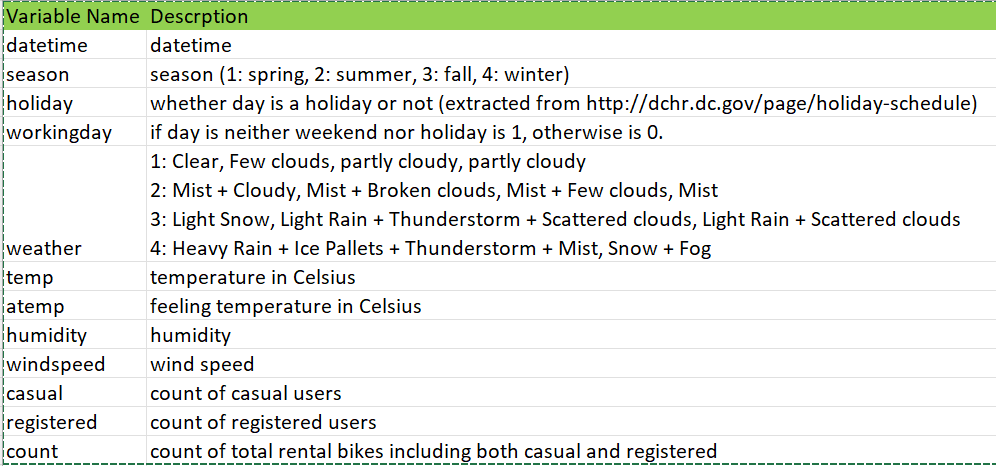

***Exploratory Data Analysis ***

In [ ]:
#1a. Find the datatypes of all attributes
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
#Find the length of the dataset
df.shape

(10886, 12)

In [ ]:
#checking the colunms and find the unique values in a coulumn
df.holiday.unique()

array([0, 1])

In [ ]:
#converting numeric dtype to category data type
df["holiday"].replace(0, 'Not Holiday', inplace = True)
df["holiday"].replace(1, 'Holiday', inplace = True)
df["holiday"] = df["holiday"].astype('category')

In [ ]:
#converting numeric dtype to category data type
df["workingday"].replace(1, 'workingday', inplace = True)
df["workingday"].replace(0, 'weekend or holiday', inplace = True)
df["workingday"] = df["workingday"].astype('category')

In [ ]:
df["weather"] = df["weather"].astype('category')

In [ ]:
df.season.unique()

array([1, 2, 3, 4])

In [ ]:
df["season"].replace(1, 'spring', inplace = True)
df["season"].replace(2, 'summer', inplace = True)
df["season"].replace(3, 'fall', inplace = True)
df["season"].replace(4, 'winter', inplace = True)
df["season"] = df["season"].astype('category')

In [ ]:
#convert datetime datatype to Timestamp
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
df.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [ ]:
#1b.Finding missing values in each column
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

No missing values found,so no need of imputation

In [ ]:
#1b.Finding any duplicate values in each column
df[df.duplicated()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


No duplicates present in all colunms

In [ ]:
df['count'].max()

977

Outlier Treatment

In [ ]:
#Outlier checking on Continuous values
df_num=df.select_dtypes(include=np.number)
df_num.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count'],
      dtype='object')

In [ ]:
df_num.drop(['temp', 'atemp', 'humidity', 'windspeed', ], axis = 1, inplace = True)
df_num.head()

,casual,registered,count
0,3,13,16
1,8,32,40
2,5,27,32
3,3,10,13
4,0,1,1


In [ ]:
#calculating IQR to remove the outlier
q1 = df_num.quantile(0.25)
q3 = df_num.quantile(0.75)

IQR = q3 -  q1
print(IQR)

casual         45.0
registered    186.0
count         242.0
dtype: float64


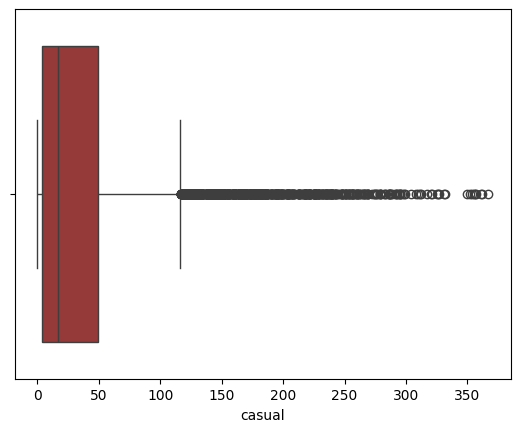

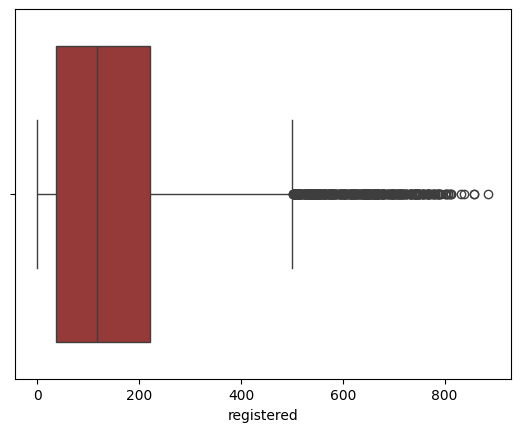

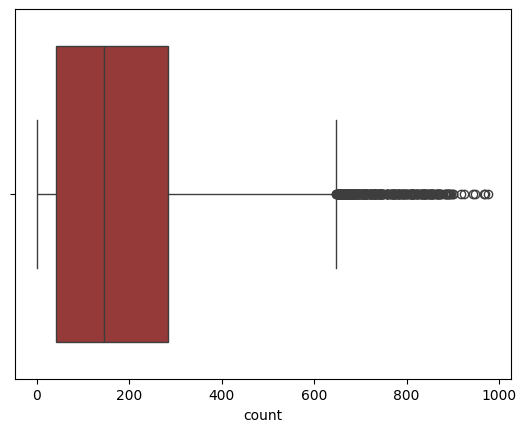

In [ ]:
for col in enumerate(df_num):
    sns.boxplot(x=col[1], data=df_num,color='brown')
    plt.show()

In [ ]:
#1e All the outlier are removed form the int datatype columns using IQR method
data = df[~(df_num[(df_num < (q1 - 1.5*IQR)) | (df_num > (q3 + 1.5*IQR))]).any(axis=1)]
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,Not Holiday,weekend or holiday,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,spring,Not Holiday,weekend or holiday,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,spring,Not Holiday,weekend or holiday,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,spring,Not Holiday,weekend or holiday,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,spring,Not Holiday,weekend or holiday,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,winter,Not Holiday,workingday,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,winter,Not Holiday,workingday,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,winter,Not Holiday,workingday,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,winter,Not Holiday,workingday,1,13.94,17.425,61,6.0032,12,117,129


All the outlier are treated successfully


<Axes: title={'center': 'count of casual bikes'}, ylabel='Frequency'>

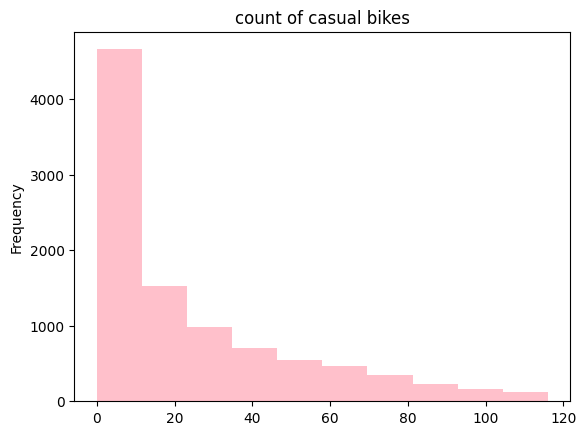

In [ ]:
#1d.Check the distribution of numerical varibales
data['casual'].plot(kind='hist',title='count of casual bikes',color='pink')


<Axes: xlabel='count of registered bikes', ylabel='Count'>

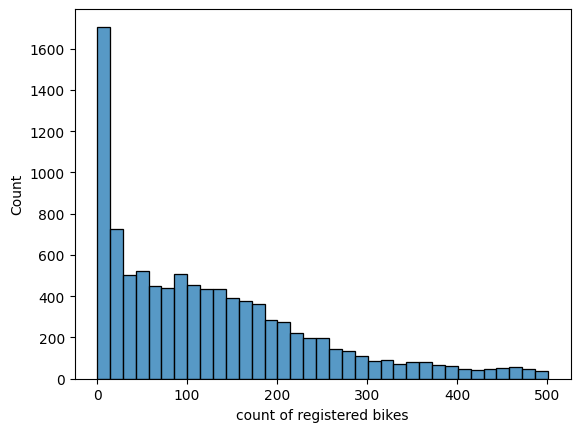

In [ ]:
#1d.Check the distribution of numerical varibales

plt.xlabel('count of registered bikes')
sns.histplot(data['registered'])


<Axes: title={'center': 'count of total rental bikes'}, ylabel='Frequency'>

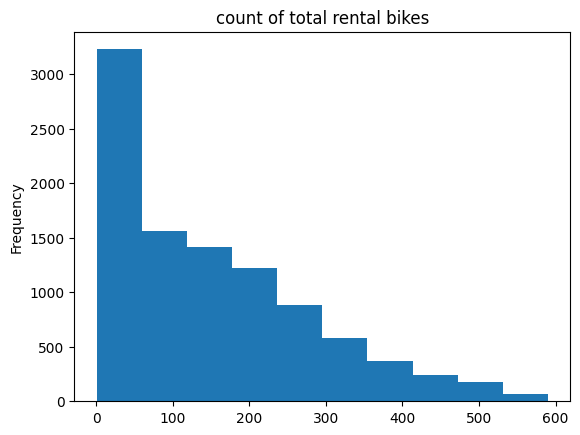

In [ ]:
#1d.Check the distribution of numerical varibales
data['count'].plot(kind='hist',title='count of total rental bikes')

In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,Not Holiday,weekend or holiday,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,Not Holiday,weekend or holiday,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,Not Holiday,weekend or holiday,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,Not Holiday,weekend or holiday,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,Not Holiday,weekend or holiday,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
data['season'].value_counts()

season
spring    2600
winter    2493
summer    2346
fall      2305
Name: count, dtype: int64

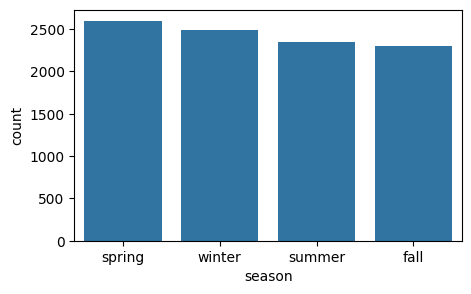

In [ ]:
#1d.Checkinh Univarate analysis for categorical values on season
plt.figure(figsize=(5,3))
sns.countplot(data=data, x='season', order = data['season'].value_counts().index)
plt.show()

From the above chart we can see all season are equally distributed ,which means season doesn't impact the count of registered bikes.But there is a slight less count in the spring season

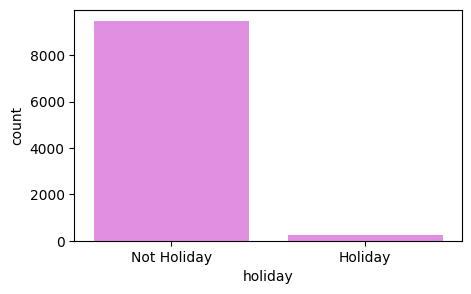

In [ ]:
#1d.Checkinh Univarate analysis for categorical values on holiday
plt.figure(figsize=(5,3))
sns.countplot(data=data, x='holiday', order = data['holiday'].value_counts().index,color='violet')
plt.show()

From the above graph ,we can see 99% of the bike are registered on not holiday days

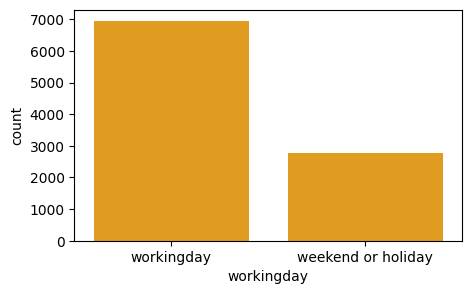

In [ ]:
#1d.Checkinh Univarate analysis for categorical values on workingday
plt.figure(figsize=(5,3))
sns.countplot(data=data, x='workingday', order = data['workingday'].value_counts().index,color='orange')
plt.show()

from the above graph ,we can see the registration of bike are 50 percent more in working day than the weekend or holiday

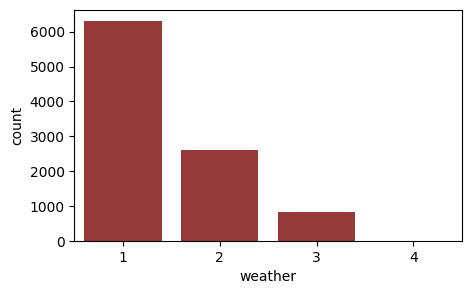

In [ ]:
#1d.Checkinh Univarate analysis for categorical values on weather
plt.figure(figsize=(5,3))
sns.countplot(data=data, x='weather', order = data['weather'].value_counts().index,color='brown')
plt.show()

1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


From the above graph,we can see there is no bike has been registered during the haeavy rain,which means weateher is crucial factor determining the bike demand

In [ ]:
data.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [ ]:
#2Numeric -Numeric Relation checking for dependent and independent variables
data_corr=data.select_dtypes(include=np.number)
data_corr.head()

,temp,atemp,humidity,windspeed,casual,registered,count
0,9.84,14.395,81,0.0,3,13,16
1,9.02,13.635,80,0.0,8,32,40
2,9.02,13.635,80,0.0,5,27,32
3,9.84,14.395,75,0.0,3,10,13
4,9.84,14.395,75,0.0,0,1,1


In [ ]:
data_corr.corr()

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.986218,-0.001363,-0.032772,0.517067,0.279005,0.348072
atemp,0.986218,1.000000,0.018167,-0.076602,0.509716,0.275498,0.343522
humidity,-0.001363,0.018167,1.000000,-0.322095,-0.321399,-0.248771,-0.281677
windspeed,-0.032772,-0.076602,-0.322095,1.000000,0.102367,0.095712,0.104000
casual,0.517067,0.509716,-0.321399,0.102367,1.000000,0.579132,0.707446
registered,0.279005,0.275498,-0.248771,0.095712,0.579132,1.000000,0.985885
count,0.348072,0.343522,-0.281677,0.104000,0.707446,0.985885,1.000000


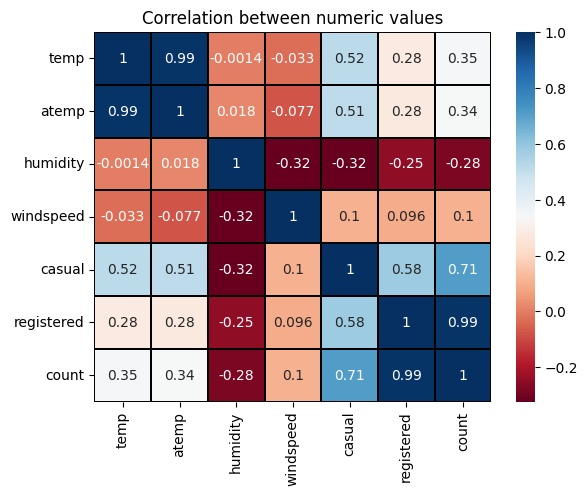

In [ ]:
sns.heatmap(data_corr.corr(), cmap="RdBu", linecolor="black",linewidths=0.01, annot=True)
plt.title('Correlation between numeric values');
plt.show()



*   Diagonal values are all 1 because they represent correlation between the same variable
*   The stronger the colour, the stronger the correlation between the variables




**Positive corelation:**
*   As the temperature and feeling temp increase the casual,registered count also increasing.

**Negative correlation:**


*   Humididty and total counts of bike are negativley correlated,so lesser the humididty more number of bikes counted and also registred because the **corelation is = -0.28**

**Zero correlation:**


*   temperature and atemperature have no corrrelation on count of total bikes










**Bivariate Analysis**

In [ ]:
#Bivariate Analysis

In [ ]:
data['workingday'].unique()

['weekend or holiday', 'workingday']
Categories (2, object): ['weekend or holiday', 'workingday']

**2.Significancedifference between the no. of bike rides on Weekdays and Weekends**

**workingday vs Total bike count**

In [ ]:
#get the total bike count for weekend and workingday separetly
weekends=data[data['workingday']=='weekend or holiday']['count']
weekdays=data[data['workingday']=='workingday']['count']

In [ ]:
#1a.setting up Null Hypothesis and alternate Hypothesis
#H0:There is no significant differnce in total count of bikes in weekend and weekdays(mu1 equal mu2)
#H1:There is significant differnce in total count of bikes in weekend and weekdays(mu1 not equal mu2)

In [ ]:
#Here the two groups of values weekend and weekdays are independtant values .
#And we need to find any effect on numeric field i.e total bike count by this 2 groups of independent categorical value

#1b.To do Hypothesis testing we using Ttest on independent variables with 95% confidence level
#1c.Find the pvalue
st_stat, p_value = stats.ttest_ind(weekends, weekdays)
st_stat, p_value

(-14.122552537877892, 7.627521376299639e-45)

In [ ]:
#1d.
Confidence_level=.95
alpha = 1 - Confidence_level
alpha=round(alpha,2)


#1e.accept or reject the Null Hypothesis
if p_value < alpha:
  print('Reject H0; H1:There is significant differnce in total count of bikes in weekend and weekdays(mu1 not equal mu2)')
else:
  print ('Fail to Reject H0; H0:There is no significant differnce in total count of bikes in weekend and weekdays(mu1 equal mu2)')

Reject H0; H1:There is significant differnce in total count of bikes in weekend and weekdays(mu1 not equal mu2)


<Axes: xlabel='workingday', ylabel='count'>

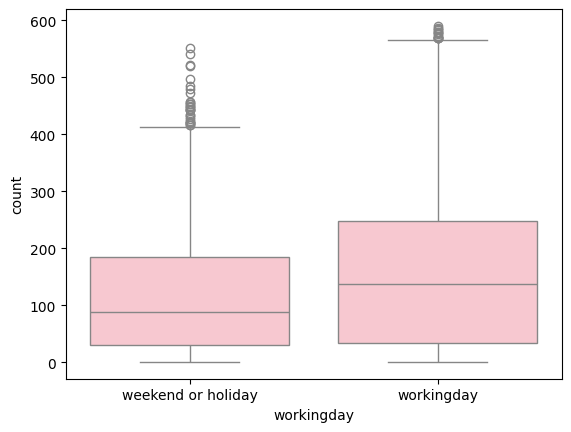

In [ ]:
sns.boxplot(x='workingday', y='count', data=data,color='pink')

From the above Hypothesis calculation and inference plot ,we can say that the average count of working day is higher than the weekend days.So it is best to increase the no of bikes keeping in the location on weekdays than the working days

**4.demand of bicycles on rent is the same for different Weather**
**conditions**

**Weather vs Bike counts**

In [ ]:
data['weather'].unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [ ]:
#weather:
#1: Clear, Few clouds, partly cloudy, partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [ ]:
clear_day=data[data['weather']==1]['count']
Mist_day=data[data['weather']==2]['count']
Light_day=data[data['weather']==3]['count']
Heavy_day=data[data['weather']==4]['count']

In [ ]:
# Numerical(Total Count of bikes) Vs One independent group (Weather - 4 Categories).
# So if there's a significant difference among the numerical values when we have more than two categories in a single group to compare.

# We can use independent TTest multiple times,rather than doing this test we can use a powerful test One way ANOVA test
# But if we are doing Anova test,we need to do below prechecks and it need to satisfied the conditions.

# 1.Normality Test :
# Data should be Normally distributed/Gaussion
# Taking a sample size of 100 on bike count calculating the mean.

sample100 = [np.mean(data['count'].sample(100)) for i in range(100) ]

Checking Skewness of data

<Axes: xlabel='Bikecount_sample 100', ylabel='Count'>

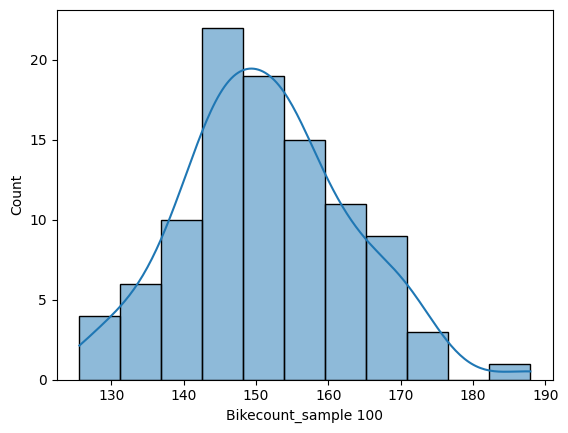

In [ ]:
#4.C.i. fig = plt.figure(figsize=(10,10))
#plt.subplot(2,3,1)
plt.xlabel('Bikecount_sample 100')
sns.histplot(sample100, kde=True)

From the above graph we can conclude the data is distributed Normally.We can check few more test before going with Anova test.

In [ ]:
data['count'].describe()

count    9744.000000
mean      149.871511
std       131.331606
min         1.000000
25%        34.000000
50%       122.000000
75%       230.000000
max       590.000000
Name: count, dtype: float64

From the above graph we can see mean is greater than median,so it is postively/right skewed distribution,further can test by skew() function as below

In [ ]:
#check the skewness of the data
data['count'].skew()

0.8962037048424285

From the above value 0.8962 which is positive vlaue,so the data is positvely skewd,further we can check by kurt function

In [ ]:
#Kurtosis calcualtion to find the shape of the probabilty distribution
kurt=data['count'].kurt()
Excess_kurtosis  =  kurt - 3
print(Excess_kurtosis)

-2.8674250078318444


Fromt the above Kurtosis calculation.
And for Excess_kurtosis < 3, it is called a Platykurtic distribution (shows lack of outliers).

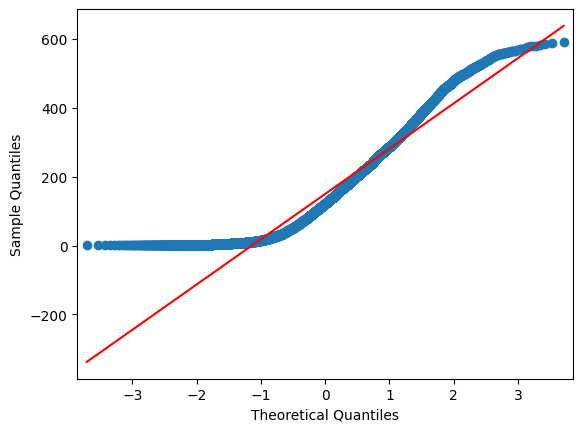

In [ ]:
#C.ii.QQ plot
qqplot(data['count'], line="s")
plt.show()

The red line in a Q-Q plot is a comparison point, like a ruler. It shows you what the data should look like if it perfectly follows a specific pattern, like a bell curve.

The red line represents the reference line.

The blue dots represent the actual data points and show you how they match up to the expected pattern.

If the red line is straight and the blue dots fall close to it, then your data fits the pattern well and follows a Normal Distribution.

If the line is crooked or the dots are scattered, then your data doesn't quite fit and does not follow a Normal Distribution.

i.e..Here the data falling into normal distribution slightly only,So further confirming it we can do shapiro test

In [ ]:
#i.e..Here the data falling into normal distribution slightly only,So further confirming it we can do shapiro test

# H0: Data is Gaussian
# Ha: Data is not Gaussian

# Shapiro-Wilk’s test
test_stat, p_value = shapiro(sample100)
print(p_value)

0.5639069080352783


In [ ]:
#Finding the Data is gaussion or not with 5% significance level
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

Fail to reject H0
Data is Gaussian


Further checking by Equality variance test by Levene's Test

In [ ]:
#There should be equal variance in different groups/categories in our data when


# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(clear_day, Mist_day,Light_day,Heavy_day)
if p_value < 0.05:
    print("Variances are not equal")

Variances are not equal


In [ ]:
#Variance should be equal for Anova test,So we can do Kruskal-Wallis test to proceed further.
#But In our case we can proceed One way Anova,as the data is Normillay distributed.(we checked it by Shapiro-Wilk’s test

In [ ]:
#4.a.Anova One way
#4.b H0: All weather have the same mean
# Ha: One or more weather have different mean
f_stats, p_value = f_oneway(clear_day, Mist_day,Light_day,Heavy_day)

print("test statistic:",f_stats)
print("p_value:",p_value)


test statistic: 46.45209330731525
p_value: 8.465264561246368e-30


In [ ]:
#4d.
Confidence_level=.95
alpha = 1 - Confidence_level
alpha=round(alpha,2)

In [ ]:
#4e.accept or reject the Null Hypothesis
if p_value < alpha:
    print("Reject H0")
    print("Atleast one weather group have different mean")
else:
    print("Fail to reject H0")
    print("All weather groups have same mean")

Reject H0
Atleast one weather group have different mean


<Axes: xlabel='weather', ylabel='count'>

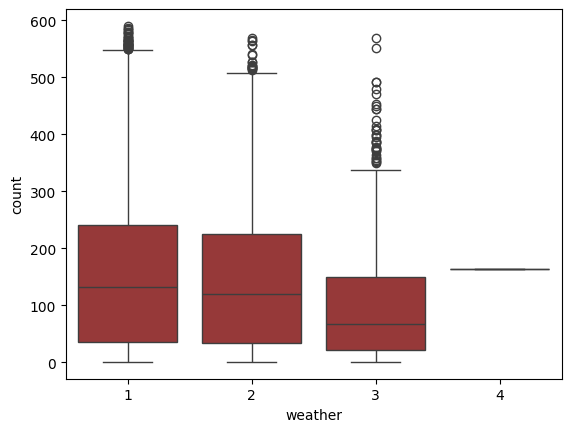

In [ ]:
#Infer the medians for different weather
sns.boxplot(x='weather', y='count', data=data,color='brown')

In [ ]:
#weather:
#1: Clear, Few clouds, partly cloudy, partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

From the above graph,we can conclude there is significat difference in all medians ,which means the weather is affecting the Bike count.There is increase in no of bike ,when the weather is Clear, Few clouds, partly cloudy, partly cloudy and Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist.

Note:And during heavy rain day,that is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog,the demand of bicycles is very low.Which is the prime factor for the drastic reduction in the bike count.



In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,Not Holiday,weekend or holiday,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,Not Holiday,weekend or holiday,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,Not Holiday,weekend or holiday,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,Not Holiday,weekend or holiday,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,Not Holiday,weekend or holiday,1,9.84,14.395,75,0.0,0,1,1


**5.demand of bicycles on rent is the same for different Seasons**

**Bike count vs Seasons**

In [ ]:
data['season'].value_counts()

season
spring    2600
winter    2493
summer    2346
fall      2305
Name: count, dtype: int64

In [ ]:
spring=data[data['season']=='spring']['count']
winter=data[data['season']=='winter']['count']
summer=data[data['season']=='summer']['count']
fall=data[data['season']=='fall']['count']

In [ ]:
# Numerical(Total Count of bikes) Vs One independent group (season - 4 Categories).
# So if there's a significant difference among the numerical values when we have more than two categories in a single group to compare.

# We can use independent TTest multiple times,rather than doing this test we can use a powerful test One way ANOVA test
# But if we are doing Anova test,we need to do below prechecks and it need to satisfied the conditions.

# 1.Normality Test :
# Data should be Normally distributed/Gaussion
# Taking a sample size of 100 on bike count calculating the mean.

sample100 = [np.mean(data['count'].sample(100)) for i in range(100) ]

<Axes: xlabel='Bikecount_sample 100', ylabel='Count'>

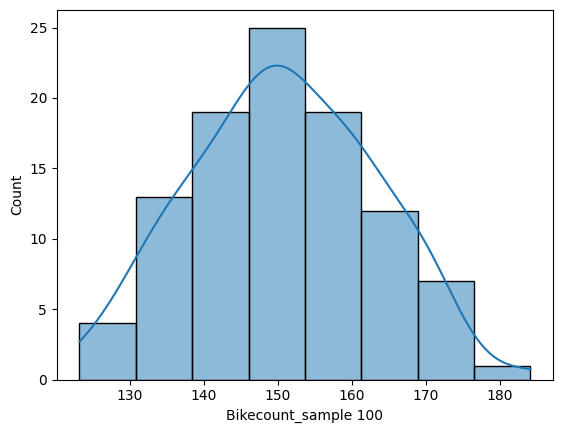

In [ ]:
#5.C.i. fig = plt.figure(figsize=(10,10))
#plt.subplot(2,3,1)
plt.xlabel('Bikecount_sample 100')
sns.histplot(sample100, kde=True)

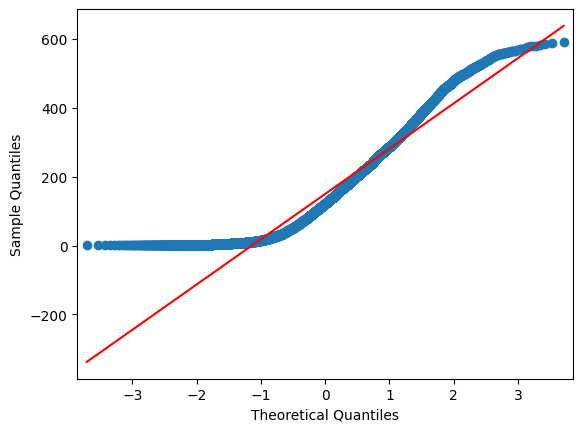

In [ ]:
#C.ii.QQ plot
qqplot(data['count'], line="s")
plt.show()


The red line in a Q-Q plot is a comparison point, like a ruler. It shows you what the data should look like if it perfectly follows a specific pattern, like a bell curve.

The red line represents the reference line.

The blue dots represent the actual data points and show you how they match up to the expected pattern.

If the red line is straight and the blue dots fall close to it, then your data fits the pattern well and follows a Normal Distribution.

If the line is crooked or the dots are scattered, then your data doesn't quite fit and does not follow a Normal Distribution.

i.e..Here the data falling into normal distribution slightly only,So further confirming it we can do shapiro test

In [ ]:
#i.e..Here the data falling into normal distribution slightly only,So further confirming it we can do shapiro test

# H0: Data is Gaussian
# Ha: Data is not Gaussian

# Shapiro-Wilk’s test
test_stat, p_value = shapiro(sample100)
print(p_value)

0.6043097376823425


In [ ]:
#Finding the Data is gaussion or not with 5% significance level
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

Fail to reject H0
Data is Gaussian


Further checking by Equality variance test by Levene's Test

In [ ]:
#There should be equal variance in different groups/categories in our data when


# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(clear_day, Mist_day,Light_day,Heavy_day)
if p_value < 0.05:
    print("Variances are not equal")

Variances are not equal


In [ ]:
#Variance should be equal for Anova test,So we can do Kruskal-Wallis test to proceed further.
#But In our case we can proceed One way Anova,as the data is Normillay distributed.(we checked it by Shapiro-Wilk’s test)

In [ ]:
#5.a.Anova One way
#5.b H0: All season have the same mean
# Ha: One or more season have different mean
f_stats, p_value = f_oneway(spring, winter,summer,fall)
print(p_value)

7.996972694386891e-104


In [ ]:
#5d.
Confidence_level=.95
alpha = 1 - Confidence_level
alpha=round(alpha,2)

In [ ]:
#4e.accept or reject the Null Hypothesis
if p_value < alpha:
    print("Reject H0")
    print("Atleast one season group have different mean")
else:
    print("Fail to reject H0")
    print("All season groups have same mean")

Reject H0
Atleast one season group have different mean


<Axes: xlabel='season', ylabel='count'>

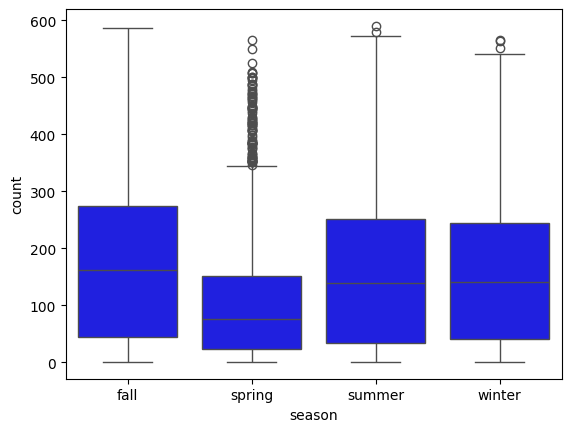

In [ ]:
#Infer the medians for different weather
sns.boxplot(x='season', y='count', data=data,color='blue')

From the above graph,we can conclude there is significat difference in all medians ,which means the season is affecting the Bike count.There is increase in no of bike ,when the season is Fall, summer and winter

Note:And during spring there is huge number of outlier,the demand of bicycles is very drastic high.So we can increase the bike count during the Spring season.

**6.Weather conditions are significantly different during different Seasons**

**Weather vs Seasons**

In [ ]:
# We need to find is there is any significant relation between Weather and season.
# Since both are categorical values ,we have the perfect test to deal with it call Chi Square Test for Independence.

# But before Diving into this Chi Square Test for Independence,we need to know the Degree of freedom test to know how much freedom we can determine before doing analysis.

In [ ]:
#Find the Degree of freedom by Contingency Table
pd.crosstab(index=df['weather'],columns=df['season'])

season,fall,spring,summer,winter
weather,,,,
1,1930,1759,1801,1702
2,604,715,708,807
3,199,211,224,225
4,0,1,0,0


In [ ]:
#H0: season and weather  are not associated
#Ha: season and weather  are associated

In [ ]:
Weather_Seasons = [
    [1930,1759,1801,1702],
    [604,715,708,807],
    [199,211,224,225],
    [0,0,1,0]]
#find the chi square contigency
chi_stat, p_value, df, exp_freq = chi2_contingency(Weather_Seasons) # chi_stat, p_value, df, expected values
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",df)
print("exp_freq:",exp_freq)

chi_stat: 49.08754974632252
p_value: 1.5982528530208675e-07
df: 9
exp_freq: [[1.80559765e+03 1.77388572e+03 1.80625831e+03 1.80625831e+03]
 [7.11493845e+02 6.98997795e+02 7.11754180e+02 7.11754180e+02]
 [2.15657450e+02 2.11869833e+02 2.15736359e+02 2.15736359e+02]
 [2.51056403e-01 2.46647070e-01 2.51148264e-01 2.51148264e-01]]


In [ ]:
#6d.
Confidence_level=.95
alpha = 1 - Confidence_level
alpha=round(alpha,2)

In [ ]:
#6e.accept or reject the Null Hypothesis
if p_value < alpha:
    print("Reject H0")
    print("season and weather  are associated")
else:
    print("Fail to reject H0")
    print("season and weather  are not associated")

Reject H0
season and weather  are associated


<Axes: xlabel='season', ylabel='count'>

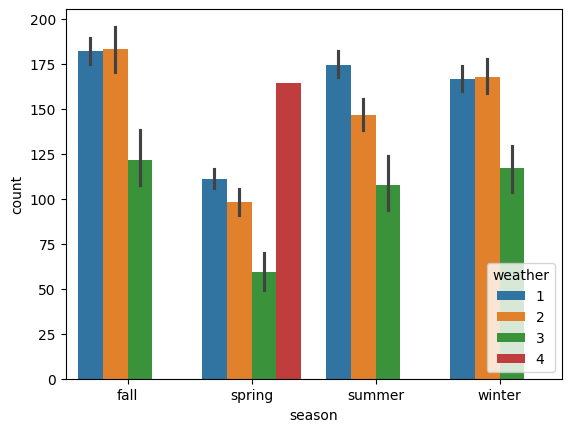

In [ ]:
#6f To check bike count on different seasons and weathers
#fig = plt.figure(figsize=(10,10))
sns.barplot(data=data, x='season',y='count',hue='weather')

From the above test,we can conclude both the weather and season are associated.And when the weather is heavy,there is 95% confidence the bike count will be less.

**Insights:**

1.Fromt the data,99% of the bike are registered on non holiday days.

2.The registration of bike are 50 percent more in working day than the weekend or holiday.

3.There is no bike has been registered during the haeavy rain(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog),which means weateher is crucial factor determining the bike demand

4.As the temperature and feeling temp increase the casual & registered bike count also increasing,means they are Positivly corelated.

5.Humididty and total counts of bike are negativley correlated,so lesser the humididty more number of bikes counted and also registred.

6.Temperature and atemperature have no corrrelation on count of total bikes



**Recommedentations:**

1.From the above Hypothesis calculation and inference plot ,we can say that the average count of working day is higher than the weekend days.
So it is best to increase the no of bikes keeping in the location on weekdays than the working days

2.we can conclude there is significat difference in all medians ,which means the weather is affecting the Bike count.
There is increase in number of bikes ,when the weather is Clear, Few clouds, partly cloudy, partly cloudy and Mist + Cloudy,
Mist + Broken clouds, Mist + Few clouds, Mist.

3.And during heavy rain day,that is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog,the demand of bicycles is very low.Which is the prime factor for the drastic reduction in the bike count.

4.we can conclude there is significat difference in all medians ,which means the season is affecting the Bike count.There is increase in no of bike ,when the season is Fall, summer and winter

5.And during spring there is huge number of outlier,the demand of bicycles is very drastic high.So we can increase the bike count during the Spring season.

6.we can conclude both the weather and season are associated.And when the weather is heavy,there is 95% confidence the bike count will be less.

7.So,Yulu can consider the weather and season as the prime factor to lunch the vehicle and they can consider few more internal factors on temperature,working days.